# Regression

## Überblick

In diesem Abschnitt werden einfache Regressionsprobleme vorgestellt.
Für lineare Modellfunktionen führt dies auf nicht restringierte
konvexe quadratische Optimierungsprobleme, die mit verschiedenen
numerischen Verfahren gelöst werden können.
Die wichtigsten Algorithmen werden kurz erläutert und verschiedene
Interpretationsmöglichkeiten ihrer Arbeitsweisen erklärt.

## Grundlagen

Viele Anwendungen im Data-Science Bereich führen zur folgenden Aufgabenstellung:

- gegeben sind Daten-Paare 
  \begin{equation*} 
  (x_i, y_i), \quad i=1,\ldots,m,
  \end{equation*}
  sowie eine **Modellfunktion** $g$ mit
  \begin{equation*} 
  y = g(x,w)
  \end{equation*} 
  die bei geeigneter Wahl des 
  Parameters $w\in\mathbb{R}^n$ den Zusammenhang 
  zwischen $x_i$ und $y_i$ näherungsweise beschreiben soll
  
- hat man $w$ bestimmt, so bewertet man mit einer geeigneten Funktion
  $l(w)$ (**Loss**), wie gut das Modell die Daten approximiert
  
- in der Regel geht man davon aus, dass die Anzahl der Messpunkte größer gleich der Anzahl der Parameter ist,
  also $m \ge n$
  
- der Modellfehler an der Stelle $x_i$ wird mit einer Funktion 
  \begin{equation*} 
  l_i(w)
  \end{equation*} 
  gemessen, z.B.
  \begin{equation*} 
  l_i(w) = \frac{1}{2}\|g(x_i, w) - y_i\|
  \end{equation*}
  mit einer geeigneten Norm $\|\cdot\|$
  
- Ziel ist es, $w$ so zu bestimmen, dass
  \begin{equation*}  
  l(w) = \frac{1}{2m}\sum_{i=1}^m l_i(w) 
  \end{equation*}
  möglichst klein wird

Wir erhalten also ein **nicht restringiertes Optimierungsproblem**
\begin{equation*} 
w^* = \text{argmin}_{w\in\mathbb{R}^n} l(w).
\end{equation*}

Benutzt man als Loss
\begin{align*} 
l_i(x) 
&= \frac{1}{2} \|g(x_i,w) - y_i\|_2^2\\
&= \frac{1}{2} \big( g(x_i,w) - y_i, g(x_i,w) - y_i \big)_2
\end{align*}
so erhält man
\begin{equation*} 
l(w) 
= \frac{1}{2m}\sum_{i=1}^m l_i(w) 
= \frac{1}{2m} L^T(w) L(w)
= \frac{1}{2m} \|L(w)\|_2^2
\end{equation*}
mit
\begin{equation*} 
L(w) =
\begin{pmatrix}
g(x_1,w) - y_1 \\
\vdots \\
g(x_m,w) - y_m
\end{pmatrix}.
\end{equation*}
Somit ist das nicht restringierte Optimierungsproblem
\begin{equation*} 
w^* = \text{argmin}_{w\in\mathbb{R}^n} l(w)
\end{equation*}
ein (nichtlineares) Least-Square Problem.

## Lineare Regression

Ist die Modellfunktion $g$ linear affin in $w$, d.h.
\begin{equation*} 
g(x, w) = G(x)\, w + c(x)
\end{equation*}
und benutzen wir als Loss wieder
\begin{equation*} 
l(w) 
= \frac{1}{2m} \|L(w)\|_2^2
\end{equation*}
so erhalten wir
\begin{align*} 
L(w) 
&=
\begin{pmatrix}
G(x_1)\, w + c(x_1) - y_1 \\
\vdots \\
G(x_m)\, w + c(x_m) - y_m
\end{pmatrix}
\\
&=
\begin{pmatrix}
G(x_1) \\
\vdots \\
G(x_m)
\end{pmatrix}
\,w 
-
\begin{pmatrix}
y_1 - c(x_1) \\
\vdots \\
y_m - c(x_m)
\end{pmatrix}
\end{align*}
also
\begin{equation*} 
l(w)
= \frac{1}{2m} \|Aw - b\|_2^2
\end{equation*}
mit
\begin{equation*} 
A = \begin{pmatrix}
G(x_1) \\
\vdots \\
G(x_m)
\end{pmatrix},
\quad
b = \begin{pmatrix}
y_1 - c(x_1) \\
\vdots \\
y_m - c(x_m)
\end{pmatrix}
\end{equation*}
und somit ein lineares Ausgleichproblem.

Wir lösen
\begin{equation*} 
w^* = \text{argmin}_{w\in\mathbb{R}^n} l(w).
\end{equation*}
mit den üblichen Methoden aus der Analysis.

Wegen
\begin{align*} 
l(w) 
&= \frac{1}{2m} \|Aw - b\|_2^2 \\
&= \frac{1}{2m} (Aw - b, Aw - b)_2 \\
&= \frac{1}{2m} (w^T A^T A w - 2 w^T A^T b + b^T b)
\end{align*}
ist $l$ quadratisch (und damit differenzierbar),
so dass dies besonders einfach ist.

Für die Ableitungen 
von $l$ im Punkt $w$ angewandt auf $u$ (Ableitungen sind lineare Operatoren, Jacobi-Matrizen) erhalten wir nach der Produktregel für beliebiges $u$
\begin{align*} 
l'(w)(u)
&= \frac{1}{2m} (u^T A^T A w + w^T A^T A u - 2 u^T A^T b )\\
&= \frac{1}{m} u^T (A^T A w - A^T b )
\end{align*}
also
\begin{equation*} 
l'(w) = \frac{1}{m} A^T(A w - b).
\end{equation*}
Für die zweite Ableitung von $l$ an $w$ erhalten wir
\begin{equation*} 
l''(w)(u)(v) = \frac{1}{m} u^T A^T A v
\quad
\forall u,v
\end{equation*}
und somit
\begin{equation*} 
l''(w) = \frac{1}{m} A^T A.
\end{equation*}

Die Bedingung $l'(w)=0$ ist also äquivalent zum **Normalgleichungssystem**
\begin{equation*} 
A^TA w = A^Tb.
\end{equation*}
Da die zweite Ableitung
\begin{equation*} 
l''(w) = \frac{1}{m} A^T A
\end{equation*}
positiv semidefinit ist, ist jede Lösung des Normalgleichungssystem ein
lokales Minimum. Zusätzlich ist $l$ konvex, so dass lokale Minima immer auch globale
sind.

Bleibt noch die Frage zu klären, ob das Normalgleichungssystem auch immer eine Lösung besitzt. 

Aus der linearen Algebra wissen wir, dass $Bw=c$ genau dann lösbar ist, wenn $c\in N(B^T)^\bot$. Hat man eine Lösung $\tilde{w}$ bestimmt, so erhält man alle Lösungen durch $w = \tilde{w} + N(B)$.

In unserem Fall ist $B=A^TA$, $B^T=B$, also auch $N(B^T)=N(B)$.
Für beliebiges $z\in N(B)$ gilt
\begin{equation*} 
0 = Bz = A^TAz
\quad \Rightarrow \quad
0 = z^TA^TAz = \|Az\|_2
\quad \Rightarrow \quad
Az = 0
\end{equation*}
und somit gilt $N(B)\subset N(A)$. Da offensichtlich auch
$N(A)\subset N(A^TA) = N(B)$ gilt, ist $N(B)=N(B^T) = N(A)$.


Für $c=A^Ty$ und $z\in N(B^T) = N(A)$ beliebig folgt
\begin{equation*} 
c^T z = (A^Ty)^Tz = y^T A z = 0 \quad \forall z\in N(B^T),
\end{equation*}
also *hat das Normalgleichungssystem immer (mindestens) eine Lösung*.

Damit haben wir gezeigt, dass das lineare Regressionsproblem
\begin{equation*} 
w^* = \text{argmin}_{w\in\mathbb{R}^n} l(w),
\quad
l(w)  = \frac{1}{2m} \|Aw - b\|_2^2 
\end{equation*}
äquivalent ist zum Lösen des Normalgleichungssystems
\begin{equation*} 
A^TA w =A^Tb.
\end{equation*}

Deshalb haben wir die folgenden Möglichkeiten, diese Aufgabe
numerisch zu behandeln:

- durch numerische Optimierungsverfahren, die auf $l(w)$ angewandt werden

- durch Verfahren der numerischen linearen Algebra, die $A^TA w = A^Tb$ lösen

## Numerische Verfahren

### Testproblem

Für $x_i, y_i \in \mathbb{R}$ betrachten wir nun eine einfache lineare Regression, d.h. die Modellfunktion ist
\begin{equation*} 
g(x,w) = w_1 + w_2 \, x,
\end{equation*}
also linear in $w$. Die $l_i$ haben alle identische Struktur, nämlich
\begin{equation*} 
l_i(w) = \frac{1}{2} \big( g(x_i,w) - y_i \big)^2 = \frac{1}{2} \big( w_1 + w_2 \, x_i - y_i \big)^2,
\end{equation*}
d.h. man misst den quadratischen Abstand zwischen der Vorhersage $g(x_i,w)$ des Modells und dem Messpunkt $y_i$.
Als Zielfunktion erhalten wir damit

\begin{equation*}  
l(w) 
= \frac{1}{m}\sum_{i=1}^m \frac{1}{2} \big( w_1 + w_2 \, x_i - y_i \big)^2
= \frac{1}{2m} \|Xw - y\|_2^2
\end{equation*}
mit 
\begin{equation*} 
X = 
\begin{pmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_m
\end{pmatrix},
\quad
w = 
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix},
\quad
y = 
\begin{pmatrix}
y_1 \\
\vdots \\
y_m
\end{pmatrix}.
\end{equation*}

Wir benutzen in unserem Testproblem den folgenden Datensatz

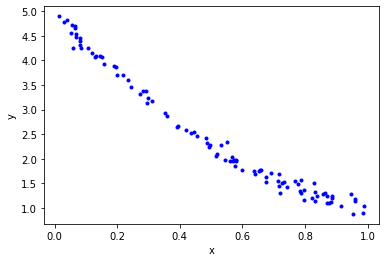

In [1]:
import autograd.numpy as np
from autograd import jacobian

import scipy as sp
import matplotlib.pyplot as plt
import sympy as sy

seed = 17

from IPython.display import Math
%precision 5
np.set_printoptions(precision=5)

import warnings
warnings.filterwarnings("ignore")

m = 100

delta = 1e-1

h = lambda x : 5 - 7*x + 3 * x**2

np.random.seed(seed)
x = np.random.rand(m)
y = h(x) + delta * np.random.randn(*x.shape)

%matplotlib inline
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y');

### Optimierungsverfahren

Numerische Standardverfahren zum Lösen nicht restringierter, konvexer Optimierungsprobleme sind Abstiegs-Verfahren
wie z.B. das Gradienten- und das Newton-Verfahren.

#### Gradientenverfahren (Gradient-Descent, GD)

Das Gradientenverfahren (Gradient Descent, GD) ist das einfachste Abstiegs-Verfahren für differenzierbare Zielfunktionen $l(w)$.
Die Iterationsvorschrift lautet
\begin{equation*} 
w^{(k+1)} = w^{(k)} - \gamma^{(k)} l'\big( w^{(k)} \big), 
\quad 
\gamma^{(k)} \ge 0.
\end{equation*}
Dabei ist die Abstiegsrichtung $-l'\big( w^{(k)} \big)$ der negative Gradient
von $l$ am Punkt $w^{(k)}$ (Richtung des lokal steilsten Abstiegs) und 
$\gamma^{(k)}$ die Schrittlänge (learning-rate), die üblicherweise konstant ist oder über
eine **Liniensuche** (Armijo, Wolfe etc.) bestimmt wird.

Wie wir oben gesehen habe, erhalten wir 
\begin{equation*} 
l'(w) = \frac{1}{m}X^T(X w - y).
\end{equation*}

Die Anwendung des Verfahrens auf unser Modellproblem liefert die fogenden Ergebnisse

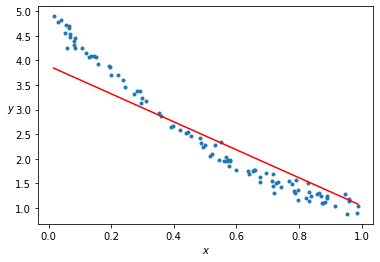

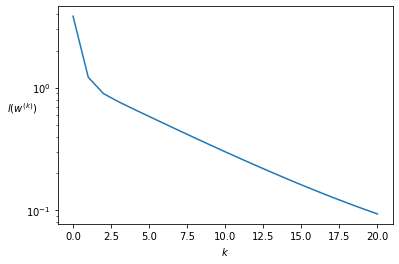

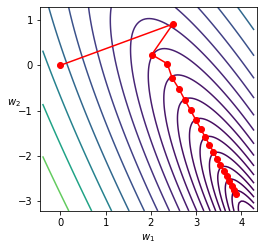

In [2]:
def g(x, w):
    return w[0] + w[1] *x

def l(w):
    return 0.5*((g(x, w) - y)**2).mean()

l1 = jacobian(l)

def GD(w0, l1, gamma = 1.0, nit = 20):
    ww = [w0]
    w  = w0.copy()
    
    for k in range(nit):
        w = w - gamma * l1(w)
        ww.append(w)
    
    return ww


def eval2d(w, l, x, y):
    # Fit
    plt.figure(1)
    plt.plot(x, y, '.');
    xp = np.linspace(x.min(), x.max())
    plt.plot(xp, g(xp, w[-1]), 'r');
    plt.xlabel('$x$')
    plt.ylabel('$y$', rotation=0)
    
    # Konvergenzgeschwindigkeit
    plt.figure(2)
    plt.semilogy(list(map(l, w)))
    plt.xlabel('$k$')
    plt.ylabel('$l(w^{(k)})$', rotation=0)
    
    # Pfad
    def kontur(ww, l, nc = 20, ng = 100):
        w = np.array(ww)
        xymin = w.min(axis=0)
        xymax = w.max(axis=0)
        xyr   = xymax - xymin
        sk    = 0.1
        xymin -= sk * xyr
        xymax += sk * xyr
        
        xlim = (xymin[0], xymax[0])
        ylim = (xymin[1], xymax[1])
        
        plt.figure(3, figsize = xyr)
        
        yy,xx = np.meshgrid(np.linspace(*ylim, num=ng), np.linspace(*xlim, num=ng))
        zz = np.array(list(map(l, list(zip(xx.flatten(), yy.flatten()))))).reshape(xx.shape)
        
        v = np.geomspace(zz.min(), zz.max(), nc)
        
        plt.contour(xx, yy, zz, v)
    
        plt.plot(w[:,0], w[:,1], 'ro-')
        plt.axis('equal')
    

    kontur(w, l)
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$', rotation=0)

    
w0 = np.zeros(2)
w = GD(w0, l1)
eval2d(w, l, x, y);

Wir beobachten folgendes:

- der Fit sieht "ganz gut" aus

- die Zielfunktion $l$ wird in den ersten paar Iterationen recht schnell reduziert, dann geht es aber
  nur langsam vorwärts (siehe Konturplot: man kommt relativ schnell ins Flache, dort werden die Schritte dann
  aber sehr klein)

- mit der vorgegebenen Anzahl an Iterationsschritten wird das (globale) Minimum noch nicht erreicht

#### Newton-Verfahren

Um $l$ zu minimieren, suchen wir mit dem Newton-Verfahren Nullstellen des Gradienten $l'$. Das ist zunächst nur
eine hinreichende Bedingung (wir könnten statt eines Minimums auch ein Maximum, einen Sattelpunkt etc. gefunden
haben).
Da unser Zielfunktion $l$ aber konvex ist, wissen wir, dass jede Nullstelle des Gradienten ein lokales
und somit auch globales Minimum ist.

Die Iterationsvorschrift für das einfache Newton-Verfahren lautet
\begin{equation*} 
w^{(k+1)} = w^{(k)} -  l''\big( w^{(k)} \big)^{-1} l'\big( w^{(k)} \big),
\end{equation*}
d.h. wir brauchen alle zweiten Ableitungen, da wir in jedem Schritt die Hesse-Matrix $l''$ auswerten müssen.
Nach oben ist
\begin{equation*} 
l'(w) = \frac{1}{m}(X^TX w - X^T y)
\end{equation*}
und damit
\begin{equation*} 
l''(w) = \frac{1}{m}X^TX.
\end{equation*}

Die Anwendung des Verfahrens auf unser Modellproblem liefert die fogenden Ergebnisse

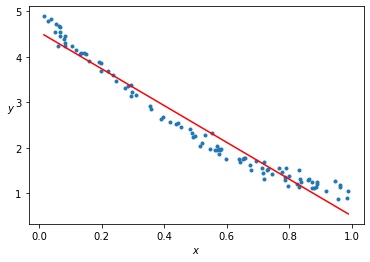

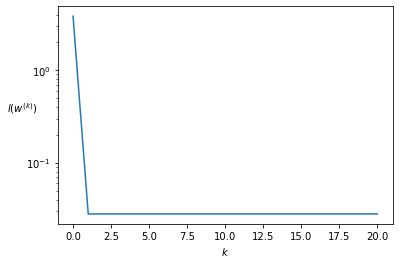

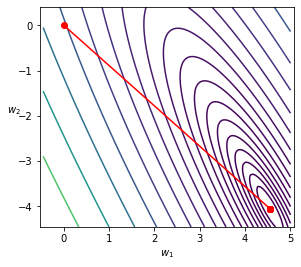

In [3]:
l2 = jacobian(l1)

def Newton(w0, l1, l2, nit = 20):
    ww = [w0]
    w  = w0.copy()
    
    for k in range(nit):
        w = w - np.linalg.solve(l2(w), l1(w))
        ww.append(w)
    
    return ww


w0 = np.zeros(2)
w = Newton(w0, l1, l2)
eval2d(w, l, x, y);

Wir beobachten folgendes:

- Newton findet die Lösung in einem Schritt, denn aus
    \begin{align*} 
    w^{(1)} 
    &= w^{(0)} -  l''\big( w^{(0)} \big)^{-1} l'\big( w^{(0)} \big)\\
    &= w^{(0)} - (X^T X)^{-1} \big(X^TX w^{(0)} - X^T y\big)\\
    &= (X^T X)^{-1}X^T y
    \end{align*}
    folgt
    \begin{equation*} 
    X^T X w^{(1)} = X^T y,
    \end{equation*}
    d.h. es wird gerade das Normalgleichungssystem gelöst

- Newton benutzt eine quadratische Approximation der Zielfunktion 
    \begin{align*} 
    l(w) \approx 
    l(w^{(k)}) 
    &+ l'(w^{(k)})(w-w^{(k)}) \\
    &+  \frac{1}{2}(w-w^{(k)})^T l''(w^{(k)})(w-w^{(k)})
    \end{align*}
    und minimiert diese *exakt* durch Lösen des zugehörigen Normalgleichungssystems.
    Da in unserem Beispiel die Zielfunktion selbst quadratisch ist, ist die quadratische Approximation
    identisch mit der Zielfunktion und ein Schritt mit Newton liefert bereits das gesuchte Minimum.

### Löser für das Normalgleichungssystem

Das Normalgleichungssysstem für unser Beispiel hat die Form
\begin{equation*}  
X^T X w = X^T y
\end{equation*}
mit 
\begin{equation*} 
X = 
\begin{pmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_m
\end{pmatrix},
\quad
w = 
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix},
\quad
y = 
\begin{pmatrix}
y_1 \\
\vdots \\
y_m
\end{pmatrix}.
\end{equation*}
Ist $m \ge 2$ und sind die $x_i$ nicht alle identisch, so ist die Matrix $X^TX$ spd, so dass
wir genau eine Lösung des Gleichungssystems erhalten.

#### Direkte Löser

##### Cholesky

Die Matrix $A$ des Normalgleichungssystem 
\begin{equation*} 
Aw = X^TX w =X^Ty = b
\end{equation*}
ist spd weshalb das System mit Cholesky-Zerlegung 
\begin{equation*} 
A = L^TL, \quad L^T z = b, \quad Lw = z 
\end{equation*}
lösbar ist. Da $L$ eine obere Dreiecksmatrix ist, kann man $L^T z = b$ und $Lw = z$
einfach durch Vorwärts- bzw. Rückwärtseinsetzen bestimmen.

Nachteile:

- die Komplexität des Algorithmus für $X\in\mathbb{R}^{m\times n}$
  ist $\mathcal{O}(m n^2)$ für die Matrixmultiplikation $X^T X$ und
  $\mathcal{O}(n^3)$ für die Zerlegung 
  
- wegen $\kappa (A) = \kappa (X)^2$ kann die Kondition sehr groß sein 
  und somit zu starken (Rundungs-)Fehlereinflüssen in der berechneten 
  Lösung $w$ führen
  
- ist $X$ sparse (dünn besetzt), dann ist $A$ oft nicht mehr sparse

- wenn $A$ sparse ist, so entstehen in der Regel beim Zerlegen von $A$ 
  sehr viele Fill-Ins, so dass $L$ sehr viel dichter besetzt ist als $A$ bzw. $X$

##### QR-Zerlegung

Wir können jede Matrix $X\in\mathbb{R}^{m\times n}$, $m\ge n$, (z.B. mit Householder oder Givens) zerlegen in
\begin{equation*} 
X 
= QR 
= Q
\begin{pmatrix}
\tilde{R} \\ 0
\end{pmatrix},
\quad
Q \in\mathbb{R}^{m\times m}, 
\quad 
R \in\mathbb{R}^{m\times n},
\quad 
\tilde{R} \in\mathbb{R}^{n\times n},
\end{equation*}
wobei $Q$ orthonormal und $\tilde{R}$ eine quadratische obere Dreiecksmatrix ist.

Setzen wir diese Zerlegung in das Normalgleichungsystem ein, so erhalten wir
\begin{align*} 
X^T X w
&= \big(\tilde{R}^T, 0\big) \, Q^T Q 
\begin{pmatrix}
\tilde{R} \\ 0
\end{pmatrix}
w\\
&= \big(\tilde{R}^T, 0\big)
\begin{pmatrix}
\tilde{R} \\ 0
\end{pmatrix}
w\\
&= \tilde{R}^T \tilde{R} w\\
&= X^Ty.
\end{align*}
Das Normalgleichungssystem ist damit äquivalent zu
\begin{equation*} 
\tilde{A}w = \tilde{R}^T \tilde{R} w = X^Ty
\end{equation*}
und $\tilde{R}^T \tilde{R}$ ist eine Cholesky-Zerlegung von $\tilde{A}w$,
so dass $w$ jetzt wieder einfach durch Vorwärts- bzw. Rückwärtseinsetzen
berechnet werden kann.

Alternativ kann man die QR-Zerlegung auch wie folgt einsetzen.
Da für orthonormale Matrizen $\|Qx\|_2 = \|x\|_2$ $\forall x$
gilt, ist
\begin{align*} 
l(w) 
&= \frac{1}{2m} \|Xw - y\|_2^2\\
&= \frac{1}{2m} \|QRw - y\|_2^2\\
&= \frac{1}{2m} \|Q^T(QRw - y)\|_2^2\\
&= \frac{1}{2m} \big\|
\begin{pmatrix}
\tilde{R} \\ 0
\end{pmatrix}
w - Q^Ty \big\|_2^2
\end{align*}
und mit $(c, d)^T := Q^T y$ folgt schließlich
\begin{align*} 
l(w) 
&= \frac{1}{2m} \big\|
\begin{pmatrix}
\tilde{R} \\ 0
\end{pmatrix}
w 
- 
\begin{pmatrix}
c \\ d
\end{pmatrix}
\big\|_2^2\\
&=
\frac{1}{2m} \big(
\| \tilde{R} w - c\|_2^2
+
\|d\|_2^2
\big).
\end{align*}
$w$ minimiert $l$ also genau dann, wenn $\tilde{R} w = c$ ist, d.h. man kann
$w$ durch Rückwärtseinsetzen bestimmen.

Vorteil:

- weniger Probleme mit der Kondition, da auf $X$ und nicht auf $A = X^TX$ gearbeitet wird


Nachteile:

- die Komplexität des Algorithmus ist für $X\in\mathbb{R}^{m\times n}$ auch 
  $\mathcal{O}(mn^2)$
- ungünstig bei  $X$ sparse (Fill-In)

#### Iterative Löser

##### CG, CGLS

Ein geeignetes iteratives Verfahren zum Lösen der Normalgleichungen ist CGLS.
Für $w^{(0)}$ gegeben,  $s^{(0)}=y-Xw^{(0)}$, $p^{(0)} = r^{(0)} = X^Ts^{(0)}$, lautet die Iterationsvorschrift
\begin{align*}
w^{(k+1)} &= w^{(k)} + \gamma^{(k)} p^{(k)} &  & \\
s^{(k+1)} &= s^{(k)} - \gamma^{(k)} X p^{(k)} & \gamma^{(k)} &= \frac{(r^{(k)}, r^{(k)})_2}{(Xp^{(k)}, Xp^{(k)})_2}\\
r^{(k+1)} &= X^Ts^{(k+1)} \\
p^{(k+1)} &= r^{(k+1)} + \beta^{(k)} p^{(k)} & \beta^{(k)} &= \frac{(r^{(k+1)}, r^{(k+1)})_2}{(r^{(k)}, r^{(k)})_2}
\end{align*}

Die Anwendung des Verfahrens auf unser Modellproblem liefert die fogenden Ergebnisse

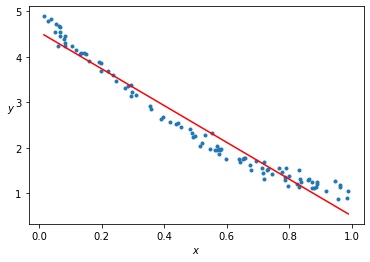

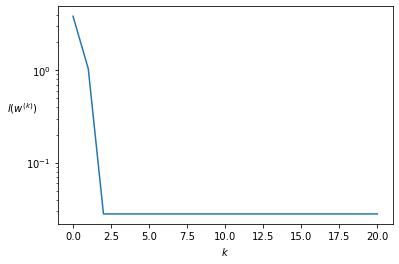

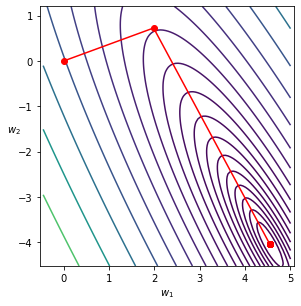

In [4]:
def CGLS(w0, X, y, nit = 20):
    ww = [w0]
    w = w0.copy()
    s = y - X.dot(w)
    r = X.T.dot(s)
    p = r.copy()
    
    rr = r.dot(r)
    
    for k in range(nit):
        Xp  = X.dot(p)
        al  = rr / Xp.dot(Xp)
        w   = w + al * p
        s   = s - al * Xp
        r   = X.T.dot(s)
        rrn = r.dot(r)
        be  = rrn / rr
        p   = r + be * p
        
        rr = rrn
        ww.append(w)
        
    return(ww)


npar = 2
wX = np.eye(npar)
X = np.array([g(x, wX[k]) for k in range(npar)]).T

w0 = np.zeros(npar)
w = CGLS(w0, X, y)

eval2d(w, l, x, y);

CGLS erreicht bereits im zweiten Schritt die exakte Lösung.
Wie wir gleich sehen werden, ist dies kein Zufall.

CGLS ist eine einfache Anpassung  des CG Verfahrens zur Lösung von spd Gleichungssystemen auf die Normalgleichungen.

Für $Aw = b$, $A$ spd, startet man CG mit $w^{(0)}$ gegeben,  $p^{(0)} = r^{(0)} = b - Aw^{(0)}$ und 
wiederholt für $k \ge 0$
\begin{align*}
w^{(k+1)} &= w^{(k)} + \gamma^{(k)} p^{(k)} &  & \\
r^{(k+1)} &= r^{(k)} - \gamma^{(k)} Ap^{(k)} &  \gamma^{(k)} &= \frac{(r^{(k)}, r^{(k)})_2}{(p^{(k)}, Ap^{(k)})_2}\\
p^{(k+1)} &= r^{(k+1)} + \beta^{(k)} p^{(k)} & \beta^{(k)} &= \frac{(r^{(k+1)}, r^{(k+1)})_2}{(r^{(k)}, r^{(k)})_2}\\
\end{align*}

Das Verfahren kann man auf zwei unterschiedlichen Wegen herleiten. 

##### Herleitung über Gradienten-Verfahren

Wir betrachten für $A$ spd die quadratische Zielfunktion
\begin{equation*} 
l(w) = \frac{1}{2}w^TAw - w^Tb.
\end{equation*}
Es gilt
\begin{equation*} 
l'(w) = Aw - b,
\quad
l'(w) = A
\end{equation*}
so dass die Lösung von $Aw=b$ das eindeutige lokale (und globale) Minimum von $l$ ist.


Wenden wir auf $l$ das Gradienten-Verfahren, so erhält man
\begin{equation*} 
w^{(k+1)} = w^{(k)} + \gamma^{(k)} r^{(k)}, \quad r^{(k)} = b - Aw^{(k)}.
\end{equation*}
Den Parameter $\gamma^{(k)}$ kann man einfach mit Hilfe einer exakten Liniensuche
berechnen. Dazu bestimmen wir das Minimum von
\begin{align*} 
\varphi(\gamma) 
&= l\big( w^{(k)} + \gamma r^{(k)} \big)\\
&= \frac{1}{2}\big( w^{(k)} + \gamma r^{(k)} \big)^TA\big( w^{(k)} + \gamma r^{(k)} \big) - \big( w^{(k)} + \gamma r^{(k)} \big)^Tb
\end{align*}
für $\gamma > 0$. $\varphi$ ist differenzierbar mit
\begin{align*}
\varphi'(\gamma) 
&= 
  \frac{1}{2} {r^{(k)}}^T A  \big( w^{(k)} + \gamma r^{(k)} \big) 
+ \frac{1}{2} \big( w^{(k)} + \gamma r^{(k)} \big)^TA r^{(k)}
- {r^{(k)}}^T b \\
&= 
  \frac{1}{2} {r^{(k)}}^T A  \big( w^{(k)} + \gamma r^{(k)} \big) 
+ \frac{1}{2} {r^{(k)}}^T A^T \big( w^{(k)} + \gamma r^{(k)} \big)
- {r^{(k)}}^T b.
\end{align*}
Wegen $A^T=A$ folgt
\begin{align*} 
\varphi'(\gamma)
&=
{r^{(k)}}^T \Big( A  \big( w^{(k)} + \gamma r^{(k)} \big) -  b \Big)\\
&=
{r^{(k)}}^T \Big(  \gamma Ar^{(k)} - \big(b - A w^{(k)} \big)\Big)
\end{align*}
und somit
\begin{equation*} 
\varphi'(\gamma) = {r^{(k)}}^T \big(\gamma Ar^{(k)} - r^{(k)}\big),
\quad
\varphi''(\gamma) = {r^{(k)}}^T A r^{(k)}.
\end{equation*}
Wegen $A$ spd ist $\varphi''(\gamma)\ge 0$ $\forall\gamma$
so dass wir aus $\varphi'(\gamma)=0$ für das Minimum 
\begin{equation*} 
\gamma^{(k)}= \frac{(r^{(k)}, r^{(k)})_2}{(r^{(k)}, Ar^{(k)})_2} > 0
\end{equation*}
erhalten.

Die exakte Liniensuche stellt also die exakte Lösung einer eindimensionale Optimierungsaufgabe in jedem Schritt entlang einer Geraden in Richtung $r^{(k)}$ dar.

Würde man pro Schritt nicht nur entlang dieser Geraden sondern in einem zweidimensionalen Unterraum suchen der diese
Gerade enthält, so würden die Ergebnisse auf jeden Fall nicht schlechter ausfallen. 
Optimieren über einen zweidimensionalen Unterraum bedeutet dann natürlich, dass in jedem Schritt nach zwei skalaren Parametern
optimiert werden muss.

CG erhält man nun, indem man den zweidimensionalen Unterraum betrachtet, der von dem aktuellen negativen Gradienten
$-l'(w^{(k)}) = r^{(k)}$ und der vorherigen Suchrichtung $p^{(k-1)}$ aufgespannt wird. 

Das Optimierungsproblem
wird wieder exakt gelöst, was implizit in der Rekursionsvorschrift steckt (deshalb auch
zwei Koeffizienten $\gamma^{(k)},\beta^{(k)}$ und Dreiterm-Rekursionen).

##### Herleitung als Projektionsverfahren

Wir wollen Näherungen für die Lösung eines spd Systems $Aw=b$, $A \in \mathbb{R}^{n \times n}$, berechnen.
Dazu betrachten wir einen Unterraum 
\begin{equation*} 
V_k \subset \mathbb{R}^n,
\quad
\dim V_k = n_k \le n.
\end{equation*}
Sei jetzt $v_1,\ldots,v_{n_k}$ eine Basis von $V_k$,
und
\begin{equation*} 
Q_k = (v_1,\ldots,v_{n_k}) \in \mathbb{R}^{n \times n_k}.
\end{equation*}

Wir projizieren jetzt $Aw=b$
in $V_k$ indem wir es zunächst in ein Variationsproblem
\begin{equation*} 
\text{finde } w \in \mathbb{R}^n \text{ mit}
\quad
(Aw, v)_2 = (b,v)_2 \quad \forall v \in  \mathbb{R}^n
\end{equation*}
umwandeln
und dann $\mathbb{R}^n$ durch $V_k$ ersetzen, d.h.
statt $w,v$ haben wir dann
\begin{equation*} 
w^{(k)} = Q_k \tilde{w},
\quad
v^{(k)} = Q_k \tilde{v},
\quad
\tilde{w}, \tilde{v} \in  \mathbb{R}^{n_k}.
\end{equation*}
also
\begin{equation*} 
\text{finde } \tilde{w} \in \mathbb{R}^{n_k} \text{ mit}
\quad
\big(A Q_k \tilde{w},  Q_k \tilde{v}\big)_2 = \big(b, Q_k \tilde{v}\big)_2 \quad \forall \tilde{v} \in \mathbb{R}^{n_k}
\end{equation*}
bzw.
\begin{equation*} 
Q_k^T A Q_k \tilde{w} = Q_k^T b,
\end{equation*}
und somit ein spd System der Dimension $n_k\times n_k$.

Ein Iterationsverfahren könnte nun wie folgt aussehen:

- betrachte Unterräume $V_k$ mit $\dim V_k = k$

- löse das projizierte $k\times k$ System $Q_k^T A Q_k \tilde{w} = Q_k^T b$

- benutze $w^{(k)} = Q_k \tilde{w}$ als Näherung für $w$

Zur Umsetzung müssen folgende Punkte noch geklärt werden:

- welche Unterräume $V_k$ sind nützlich?

- wie implementiert man das ganze möglichst geschickt?

Zu $r^{(0)} = b - Aw^{(0)}$, $A \in \mathbb{R}^{n \times n}$, betrachten wir
die **Krylov-Räume**
\begin{equation*} 
K_k(A, r^{(0)}) = \text{span}(r^{(0)}, Ar^{(0)}, A^2r^{(0)},\ldots,A^{k-1}r^{(0)} ),
\quad k=1,2,\ldots.
\end{equation*}

Sie haben folgende Eigenschaften:

- $\dim K_k(A, r^{(0)}) = n_k \leq k$

- $K_k(A, r^{(0)}) \subset K_{k+1}(A, r^{(0)})$

- ist $k_b$ der kleinste Index $k$ mit 
  $\dim K_k(A, r^{(0)}) = k = \dim K_{k+1}(A, r^{(0)})$,
  dann ist die Lösung
  $w^{(k_b)}$ des in $K_{k_b}(A, r^{(0)})$ projizierten Systems
  \begin{equation*} 
  \quad Q_{k_b}^T A Q_{k_b} \tilde{w} = Q_{k_b}^T b,\quad   
  w^{({k_b})} = Q_{k_b} \tilde{w}
  \end{equation*}
  die *exakte Lösung* von $Aw=b$
  
- $k$ hängt über $r^{(0)}$ von $b$ ab

Wegen $k \leq n$ erhalten wir nach spätestens $n$ Schritten die exakte Lösung.
Oft ist aber $k \ll n$.

Das CG-Verfahren führt genau diese Berechnungen Schritt für Schritt durch.

##### Interpretation

CG als verbessertes Gradienten-Verfahren:

- CG wird auf jeden Fall nicht langsamer
  als das Gradienten-Verfahren sein

- da CG im Schritt $k$ auf die vorherige Suchrichtung 
  \begin{equation*} 
  p^{(k-1)} = \frac{w^{(k)} - w^{(k-1)} }{\gamma^{(k-1)}}
  \end{equation*}
  zugreift, gehen in die Berechnung von $w^{(k)}$ sowohl $w^{(k)}$ als auch $w^{(k-1)}$ direkt ein
  
- damit ist CG im Gegensatz zum Gradienten-Verfahren keine stationäre Iteration mehr
  
CG als Projektionsverfahren:

- wir ersetzen das Originalsystem $Aw=b$ durch eine Folge kleinerer Systeme, die wir dann exakt lösen
  
- wir wenden also sukzessive Modellvereinfachung bzw. Dimensionsreduktion an

## Scikit-Learn

In diesem Abschnitt betrachten wir noch einmal unser einfaches Testproblem und bearbeiten es mit den Werkzeugen aus [Scikit-Learn](https://scikit-learn.org/stable/).

Lineare Modelle findet man im Subpackage
`linear_model`. Zunächst erstellt man ein Objekt der gewünschten Modellklasse und passt dann mit der `fit`-Methode die Modellparameter
an die gegebenen Daten an.

Die Werte für $w_0$ und $w_1$ sind

In [5]:
from sklearn.linear_model import LinearRegression

modell = LinearRegression()

modell.fit(x.reshape(-1,1), y);

modell.intercept_, modell.coef_

(4.5507183461173195, array([-4.04888]))

Mit der `predict`-Methode kann das angepasste Modell nun für Vorhersagen benutzt werden

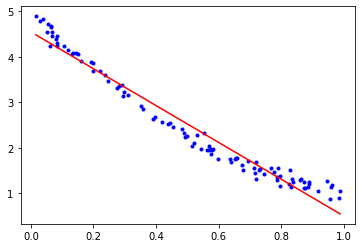

In [6]:
plt.plot(x, y, 'b.')

xp = np.linspace(x.min(), x.max())
plt.plot(xp, modell.predict(xp.reshape(-1,1)), 'r');

Rein optisch sieht das ganz gut aus. 

Zur ersten Beurteilung der Modellqualität wird beim Fit direkt 
der Score-Wert 
\begin{equation*} 
R^2 = 1 - \frac{u}{v}
\end{equation*} 
berechnet, mit
\begin{equation*} 
u = \sum_{i=1}^n (y_i - \hat{y}_i)^2,
\quad 
v = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation*}
und
\begin{equation*} 
\hat{y}_i = g(x_i, w),
\quad
\bar{y} = \frac{1}{n} \sum_{i=1}^n \hat{y}_i
\end{equation*}
Der bestmögliche Wert ist 1 (dann ist $y_i = \hat{y}_i$ $\forall i$).
In unserem Fall erhalten wir

In [7]:
print('score = {:f}'.format(modell.score(x.reshape(-1,1), y)))

score = 0.962713


Der Wert liegt nahe bei 1, suggeriert also eine gute Anpassung. Auch zahlreiche andere Metriken zeigen zunächst passable Resultate

In [8]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error

yd = modell.predict(x.reshape(-1,1))

for method in [explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error
]:
    print('{:24s} = {}'.format(method.__name__, method(y, yd)))

explained_variance_score = 0.9627130236560455
mean_squared_error       = 0.05592004195258661
mean_absolute_error      = 0.1983349567301628
median_absolute_error    = 0.19529572037977538


Betrachten wir allerdings die Residuen genauer, so finden wir einige Auffälligkeiten

res_mean = 0.000000


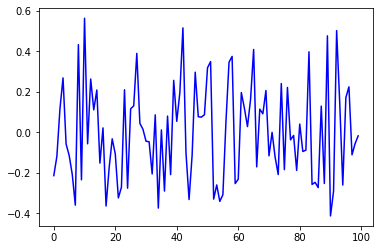

In [9]:
res = y - modell.predict(x.reshape(-1,1))
plt.plot(res, 'b')
print('res_mean = {:f}'.format(res.mean()))

Wenn die Daten wirklich mit einem linearen Modell der obigen Form erzeugt wurden, dann geben die Residuen den Messfehler in $y$ wieder.
Für reine Messfehler (ohne systematische Verzerrung) kann man
erwarten, dass diese unabhängig und normalverteilt mit Erwartungswert $0$ sind.
Um das zu untersuchen kann man die Residuen mit dem Shapiro-Wilks-Test auf Normalverteilung bzw. mit dem t-Test auf Erwartungswert 0
überprüfen.

In [10]:
from scipy.stats import shapiro, ttest_1samp

_,pshapiro = shapiro(res)
pttest = ttest_1samp(res, 0)[1]

print('p_shapiro = {:f}'.format(pshapiro))
print('p_ttest   = {:f}'.format(pttest))

p_shapiro = 0.022932
p_ttest   = 1.000000


Beim t-Test ist der p-Wert sehr groß, so dass die Hypothese
eines verschwindenden Erwartungswerts nicht verworfen wird.
Shapiro-Wilks liefert einen sehr kleinen p-Wert, so dass die Residuen
wahrscheinlich nicht normalverteilt sind.

Somit passt unsere Modellannahme mit hoher Wahrscheinlichkeit
nicht zu den gegebenen Daten. Deshalb passen wir das Modell
wie folgt an
\begin{equation*} 
g(x,w) = w_1 + w_2 \, x + w_3 \, x^2
\end{equation*}
und wiederholen die Schritte von oben.

score = 0.993122


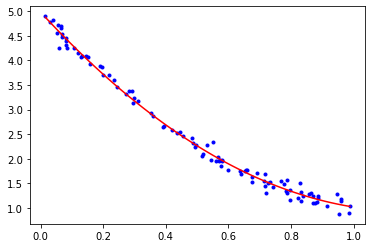

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

modell2 = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

modell2.fit(x.reshape(-1,1), y)

plt.plot(x, y, 'b.')

xp = np.linspace(x.min(), x.max())
plt.plot(xp, modell2.predict(xp.reshape(-1,1)), 'r')

print('score = {:f}'.format(modell2.score(x.reshape(-1,1), y)))

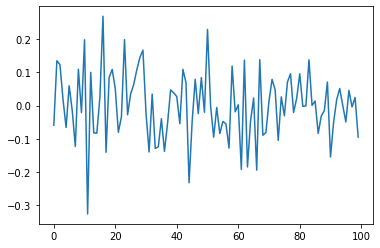

In [12]:
res = y - modell2.predict(x.reshape(-1,1))
plt.plot(res);

In [13]:
_,pshapiro = shapiro(res)
pttest = ttest_1samp(res, 0)[1]

print('p_shapiro = {:f}'.format(pshapiro))
print('p_ttest   = {:f}'.format(pttest))

p_shapiro = 0.950543
p_ttest   = 1.000000


Die p-Werte bei beiden Test sind groß, das Modell kann akzeptiert werden.

## Zusammenfassung

- Regressionsaufgaben führen zu nichtlinearen Optimierungsproblemen
- typische Optimierungsverfahren bei differenzierbrarer Zielfunktion
  sind Abstiegs-Verfahren (Gradient-Descent, Newton-artige)
- ist die Zielfunktion $l$ quadratisch und konvex, dann kann die
  Optimierungsaufgabe auch mit Methoden der Numerischen Linearen
  Algebra gelöst werden
- in diesem Fall bestehen zahlreiche Interpretationsmöglichkeiten
  für die Arbeitsweise der Algorithmen